In [13]:
import os
os.chdir(r"C:\Users\Amiya\Desktop")

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
data = pd.read_csv("Book1.csv")

In [19]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score(1-100)
0,1,male,19,15,39
1,2,male,21,15,81
2,3,female,20,16,6
3,4,female,23,16,77
4,5,female,31,7,40


In [21]:
datasubset = data.loc[:,["Age","Annual Income (k$)"]]

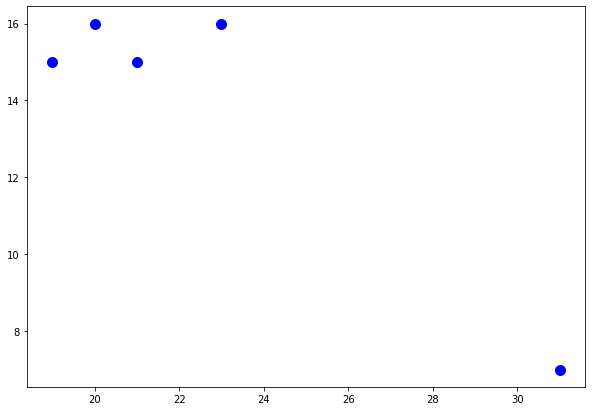

In [25]:
plt.figure(figsize= (10,7))
plt.scatter(datasubset[["Age"]], datasubset[["Annual Income (k$)"]],s=100,c='blue')

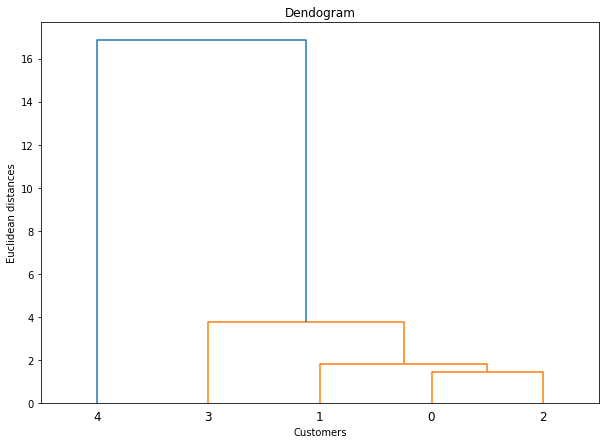

In [36]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(datasubset, method = 'ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [22]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(datasubset)

array([0, 0, 0, 0, 1], dtype=int64)

In [23]:
cl = cluster.fit_predict(datasubset)

In [24]:
from sklearn.metrics import silhouette_score

In [25]:
silhouette_score(datasubset,cl)

0.6565896213102593

In [26]:
X = datasubset.values

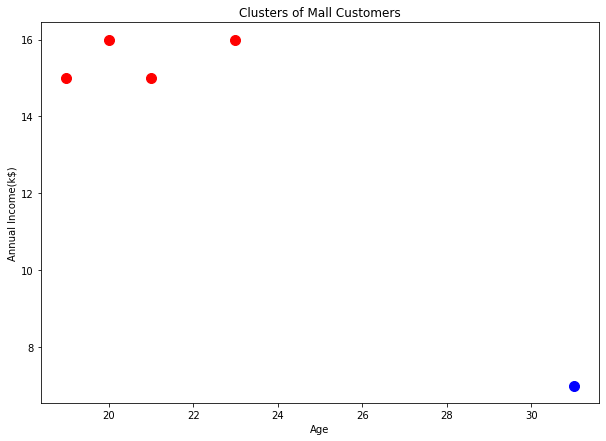

In [27]:
plt.figure(figsize=(10, 7))  
plt.scatter(X[cl==0, 0], X[cl==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[cl==1, 0], X[cl==1, 1], s=100, c='blue', label ='Cluster 2')
plt.title('Clusters of Mall Customers')
plt.xlabel('Age')
plt.ylabel('Annual Income(k$)')
plt.show()

In [28]:
#trying DBSCAN
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

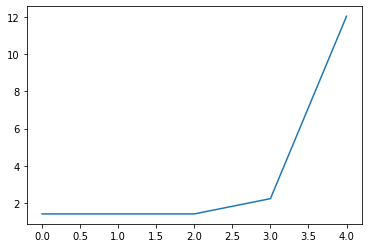

In [29]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [30]:
from sklearn.cluster import DBSCAN
dbscancluster = DBSCAN(eps=7, min_samples=5)
dbscancluster.fit(X)
clusters = dbscancluster.labels_

In [31]:
len(set(clusters))

1

In [34]:
silhouette_score(X,clusters)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [ ]:
len(set(clusters))

In [ ]:
from sklearn.cluster import KMeans
#try kmeans
individual_clustering_score = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    individual_clustering_score.append(kmeans.inertia_) 
    

plt.figure(figsize=(10,6))
plt.plot(range(1, 15), individual_clustering_score)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [35]:
#Fit the model and predict
kmeans= KMeans(n_clusters = 2, random_state = 42)


kmeans.fit(X)


pred = kmeans.predict(X)

pred

array([0, 0, 0, 0, 1])

In [36]:
silhouette_score(X,pred)

0.6565896213102593

In [37]:
#Result on scaled data
from sklearn.preprocessing import normalize
scaled = normalize(X)
scaled = pd.DataFrame(data_scaled)
scaled.head()

NameError: name 'data_scaled' is not defined

In [ ]:
individual_clustering_score = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(scaled)
    individual_clustering_score.append(kmeans.inertia_) 
    

plt.figure(figsize=(10,6))
plt.plot(range(1, 15), individual_clustering_score)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [38]:
#Fit the model and predict
kmeans= KMeans(n_clusters = 2, random_state = 42)


kmeans.fit(scaled)


pred = kmeans.predict(scaled)

pred

array([0, 0, 0, 0, 1])

In [ ]:
silhouette_score(data_scaled,pred)

In [ ]:
#Options to improve cluster
#Interview questions